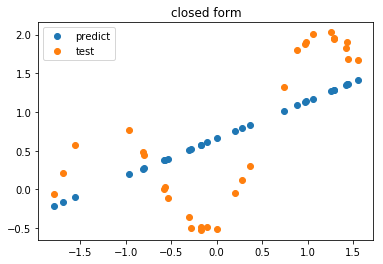

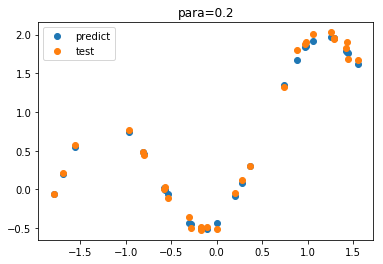

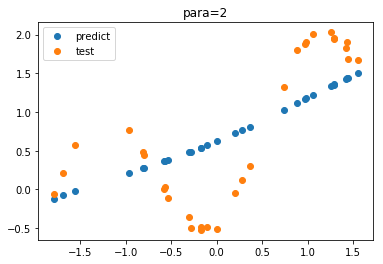

0.0028128003603817508
0.4244650453666662


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# For this problem, we use data generator instead of real dataset
def data_generator(size,noise_scale=0.05):
    xs = np.random.uniform(low=0,high=3,size=size)

    # for function y = 0.5x - 0.3 + sin(x) + epsilon, where epsilon is a gaussian noise with std dev= 0.05
    ys = xs * 0.5 - 0.3 + np.sin(3*xs) + np.random.normal(loc=0,scale=noise_scale,size=size)
    return xs, ys
def preproc_params(X_train):
    params = np.shape(X_train)
    return params

def preprocess(X_source,X_input,params):
    mean = np.mean(X_source,axis=0)
    std = np.std(X_source,axis=0)
    for i in range(params[0]):
        for j in range(params[1]):
            X_input[i][j] = (X_input[i][j]-mean[j])/std[j]
    X_input = np.insert(X_input,0,1,axis = 1)
    [data_num,feature_num]=np.shape(X_input)
    X_input =X_input.reshape(data_num,feature_num)
    return X_input
def solve(X_train,y_train):
    w = np.linalg.pinv(X_train).dot(y_train)
    w = np.reshape(w,(2,1))
    return w
def mse(X_train, y_train, w):
    [data_num,feature_num ]= np.shape(X_train)
    y_train = np.reshape(y_train,(data_num,1))
    er= (X_train@w-y_train)
    error_test=np.mean(er)
    return error_test
def G_kernel(X_source,X_test,width):
    params = np.shape(X_source)
    r = []
    for i in range(params[0]):
        r.append(np.exp(-np.linalg.norm(X_source[i]-X_test)/(2* np.square(width))))
    return np.diag(r)

def main():
    noise_scales = [0.05,0.2]
    # for example, choose the first kind of noise scale
    noise_scale = noise_scales[0]
    # generate the data form generator given noise scale
    X_train, y_train = data_generator((100,1),noise_scale=noise_scale)
    X_test, y_test = data_generator((30,1),noise_scale=noise_scale)
    params_train = preproc_params(X_train)
    params_test = preproc_params(X_test)
    X_test = preprocess(X_train,X_test,params_test)
    X_train = preprocess(X_train,X_train,params_train)
    w_linear =solve(X_train,y_train) 
    plt.plot(X_test[:,1],np.reshape(X_test@w_linear,30),'o')
    plt.plot(X_test[:,1],y_test,'o')

    plt.legend(['predict','test'])
    plt.savefig('P1:closed form.png')
    plt.title('closed form')
    plt.show()
    err=[]
    w_locallist=[]
    sigma_paras = 0.2
    sigma_paras2 = 2
    a = []
    b = []
    for i in X_test:
        R = G_kernel(X_train,i,sigma_paras)
        R2 = G_kernel(X_train,i,sigma_paras2)
        w_local=np.linalg.pinv(np.sqrt(R)@X_train)@np.sqrt(R)@y_train
        w_local2=np.linalg.pinv(np.sqrt(R2)@X_train)@np.sqrt(R2)@y_train
        np.reshape(w_local,(1,2))
        
        predict = i@w_local
        predict2 = i@w_local2
        a.append(predict)
        b.append(predict2)
    plt.figure()
    plt.plot(X_test[:,1],a,'o')
    plt.plot(X_test[:,1],y_test,'o')
    plt.legend(['predict','test'])
    plt.title('para=0.2')
    plt.show()
    plt.savefig('P1:para=0.2.png')
    plt.figure()
    plt.plot(X_test[:,1],b,'o')
    plt.plot(X_test[:,1],y_test,'o')
    plt.legend(['predict','test'])
    plt.title('para=2')
    plt.show()
    plt.savefig('P1:para=2.png')
    print(np.mean((a-y_test)**2))
    print(np.mean((b-y_test)**2))
main()


